In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))



Saving OSA_extreme_both.xlsx to OSA_extreme_both.xlsx
User uploaded file "OSA_extreme_both.xlsx" with length 26018 bytes


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_excel("OSA_extreme_both.xlsx")
data.OSA = data.OSA.astype("category").cat.codes

data = data[data['OSA']==0]

X=data[['BMI','Age','Cervical']]
y=data[['IAH']]
X_features = X.columns

scalerX = StandardScaler()
scalerX.fit(X)
X = pd.DataFrame(scalerX.transform(X))

X=X.values
y = y.values
print(X[0:5])
print(y[0:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


[[-0.2968667  -1.14030278  0.31479649]
 [ 0.36664467 -1.14030278  0.87774319]
 [-0.78935257  0.23423194  0.13444464]
 [-0.09615511 -0.7966691   0.31479649]
 [-1.58043324  0.40604878 -1.09257027]]
[[ 9. ]
 [ 2. ]
 [10. ]
 [ 3.7]
 [ 7. ]]


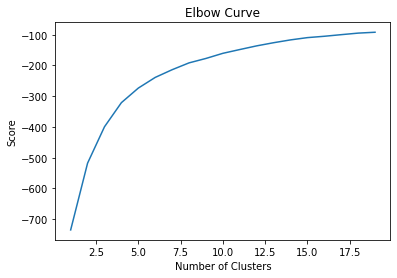

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [7]:
print(kmeans[0].fit(X).score(X))

-734.9999999999999


In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.70374236 -0.88257752 -0.79099168]
 [ 0.23693354 -0.65234296  0.58501091]
 [-0.24454212  1.28183739  0.72633884]
 [-0.41208476  0.73481369 -0.92823715]
 [ 1.99505695  0.53821558  0.86691729]]


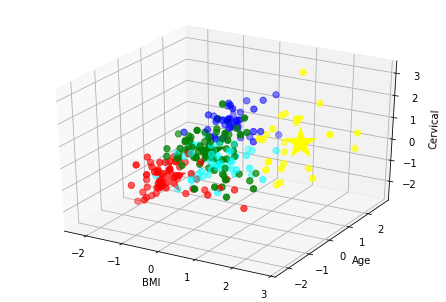

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
label = ['BMI','Age','Cervical']
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel(label[0])
ax.set_ylabel(label[1])
ax.set_zlabel(label[2])
ax.set_xlim(-2.5,3)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=40)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

_X = X
_C = C

[[24.60576121 35.         36.07142857]
 [29.51672593 37.68       40.96      ]
 [27.0030972  60.19444444 41.46210059]
 [26.12841122 53.82692308 35.58383188]
 [38.69531988 51.53846154 41.96153846]]


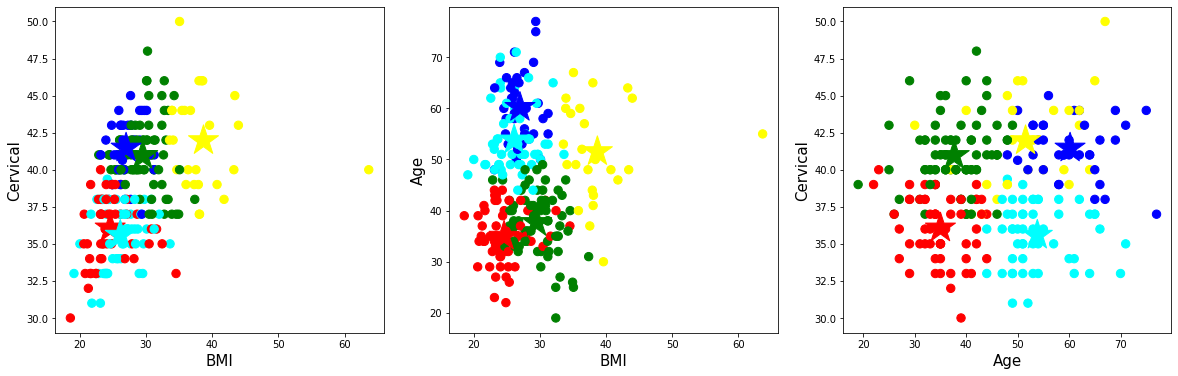

In [ ]:
X = scalerX.inverse_transform(_X)
C = scalerX.inverse_transform(_C)
print(C)
# Getting the values and plotting it
f1 = X[:,0]
f2 = X[:,2]
label = ['BMI','Age','Cervical']
plt.figure(figsize=(20, 6))
ax1 = plt.subplot(131)
ax1.set_xlabel(label[0], fontsize = 15)
ax1.set_ylabel(label[2], fontsize = 15)
ax1.scatter(f1, f2, c=asignar, s=70)
ax1.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)

f1 = X[:,0]
f2 = X[:,1]
ax2 = plt.subplot(132)
ax2.set_xlabel(label[0], fontsize = 15)
ax2.set_ylabel(label[1], fontsize = 15)
ax2.scatter(f1, f2, c=asignar, s=70)
ax2.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

f1 = X[:,1]
f2 = X[:,2]
ax2 = plt.subplot(133)
ax2.set_xlabel(label[1], fontsize = 15)
ax2.set_ylabel(label[2], fontsize = 15)
ax2.scatter(f1, f2, c=asignar, s=70)
ax2.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
copy =  pd.DataFrame()
copy['label'] = labels
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,56
1,green,75
2,blue,36
3,cyan,52
4,yellow,26


In [ ]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, _X)
most_representative =  pd.DataFrame(index=[0,1,2,3,4],columns=['Index','Color',label[0],label[1],label[2]])
most_representative['Color']=colores
i=0
for row in closest:
  most_representative['Index'][i]=row
  most_representative[label[0]][i]=X[row][0]
  most_representative[label[1]][i]=X[row][1]
  most_representative[label[2]][i]=X[row][2]
  i+=1
print(most_representative)

  Index   Color      BMI Age Cervical
0   213     red  24.9108  36       36
1    82   green  28.4055  36       41
2    97    blue  26.1493  59       41
3   175    cyan  26.6193  53       35
4   104  yellow  36.3636  52       40
